In today’s connected world, customers frequently share their experiences with airlines and aircraft on social media platforms like Twitter, Facebook, and Instagram.
Analyzing this online feedback helps aviation companies understand customer satisfaction, safety concerns, service expectations, and overall brand perception.

In this project, we apply Natural Language Processing (NLP) techniques to analyze the sentiment of social media posts related to a specific aircraft.
Our goal is to identify whether public opinions are positive, neutral, or negative, and to extract meaningful insights that can support marketing, maintenance improvements, and brand trust.

We collected a dataset of social media posts mentioning the aircraft, processed the data using text-cleaning techniques, and performed sentiment analysis using VADER, followed by visualization of the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
import re

# Download NLTK stopwords (first time only)
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
# Load dataset
# Example for Sentiment140 dataset
df = pd.read_csv('Tweets.csv', encoding='latin-1')
# If needed, rename columns for clarity
# df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Show first few rows
print(df.head())
# Clean the text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special characters
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text
# Apply cleaning
df['clean_text'] = df['text'].astype(str).apply(clean_text)







             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [10]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment
df['polarity'] = df['clean_text'].apply(get_sentiment)

# Categorize sentiment
def categorize(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(categorize)

# Show results
print(df[['clean_text', 'polarity', 'sentiment']].head())

                                          clean_text  polarity sentiment
0                                               said   0.00000   Neutral
1      plus youve added commercials experience tacky   0.00000   Neutral
2       didnt today must mean need take another trip  -0.31250  Negative
3  really aggressive blast obnoxious entertainmen...   0.00625  Positive
4                               really big bad thing  -0.35000  Negative


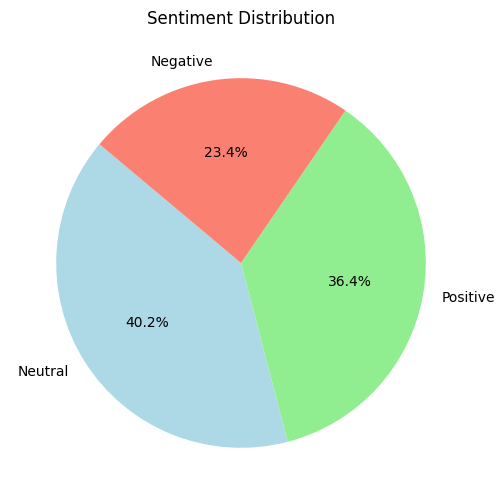

In [11]:
# Plot a pie chart
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=["lightblue", "lightgreen", "salmon"])
plt.title('Sentiment Distribution')
plt.show()

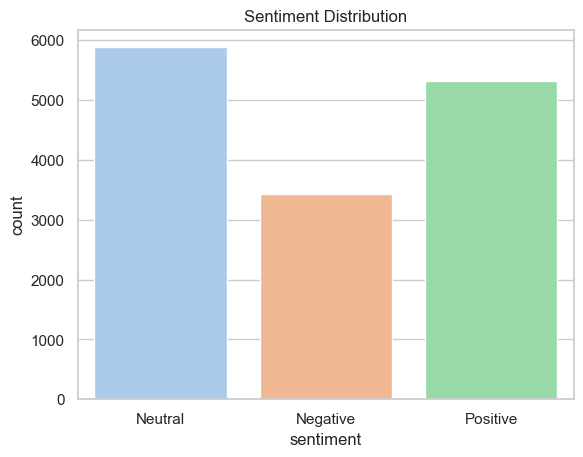

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution')
plt.show()

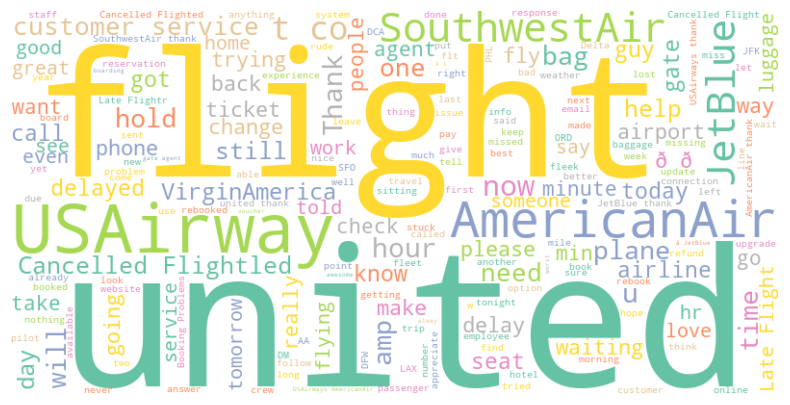

In [19]:
from wordcloud import WordCloud

text = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()